In [2]:
#Import libraries 
!pip install pandas
!pip install seaborn
!pip install xlrd
!pip install openpyxl


import pandas as pd
import numpy as np
import seaborn as sns
import xlrd


import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [74]:
#Import Data

countries = pd.read_excel(r'C:\Users\giedr\desktop\DS\Covid\countries.xlsx')
continents = pd.read_excel(r'C:\Users\giedr\desktop\DS\Covid\continents.xlsx')
world = pd.read_excel(r'C:\Users\giedr\desktop\DS\Covid\world.xlsx')
poland = pd.read_excel(r'C:\Users\giedr\desktop\DS\Covid\poland.xlsx')
pol_sum = pd.read_excel(r'C:\Users\giedr\desktop\DS\Covid\poland_summary.xlsx')


countries.head()

,Location,Population,HighestInfectionCount,PercentPopulationInfected,TotalDeathCount,PercentTotalDeathCount,HighestVaccinationCount,PercentPopulationVaccined
0,Afghanistan,41128772,224201.0,0.545120,7940.0,0.019305,9066437.0,42.742266
1,Albania,2842318,334090.0,11.754139,3604.0,0.126798,998130.0,47.440012
2,Algeria,44903228,271852.0,0.605417,6881.0,0.015324,7840131.0,17.460061
3,American Samoa,44295,8332.0,18.810249,34.0,0.076758,NaN,NaN
4,Andorra,79843,48015.0,60.136768,159.0,0.199141,9781.0,72.532345


In [5]:
#Cleaning data: countries
for col in countries.columns:
    pct_missing = np.mean(countries[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Location - 0%
Population - 0%
HighestInfectionCount - 5%
PercentPopulationInfected - 5%
TotalDeathCount - 7%
PercentTotalDeathCount - 7%
HighestVaccinationCount - 8%
PercentPopulationVaccined - 8%


In [6]:
countries = countries.replace(np.nan,0)


In [43]:
#Cleaning data: continents

for col in continents.columns:
    pct_missing = np.mean(continents[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))



continent - 0%
HighestVaccinationCount - 0%
TotalDeathCount - 0%
total_cases - 0%
total_population - 0%


In [8]:
#Cleaning data: world

for col in world.columns:
    pct_missing = np.mean(world[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


total_population - 0%
total_cases - 0%
total_deaths - 0%
DeathPercentage - 0%
HighestVaccinationCount - 0%


In [12]:
#Cleaning data: poland

for col in poland.columns:
    pct_missing = np.mean(poland[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Location - 0%
newDate - 0%
total_cases - 5%
Population - 0%
CovidPercentage - 5%
PercentTotalDeathCount - 6%
PercentPopulationVaccined - 36%


In [14]:
poland = poland.replace(np.nan,0)
poland.head()

,Location,newDate,total_cases,Population,CovidPercentage,PercentTotalDeathCount,PercentPopulationVaccined
0,Poland,2020-01-03,0.0,39857144,0.0,0.0,0.0
1,Poland,2020-01-04,0.0,39857144,0.0,0.0,0.0
2,Poland,2020-01-05,0.0,39857144,0.0,0.0,0.0
3,Poland,2020-01-06,0.0,39857144,0.0,0.0,0.0
4,Poland,2020-01-07,0.0,39857144,0.0,0.0,0.0


In [15]:
poland['PercentPopulationVaccined'] = round(poland['PercentPopulationVaccined'], 3)
poland['PercentTotalDeathCount'] = round(poland['PercentTotalDeathCount'], 4)
poland['CovidPercentage'] = round(poland['CovidPercentage'], 2)



In [16]:
#Cleaning data: poland_summary

for col in pol_sum.columns:
    pct_missing = np.mean(pol_sum[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Location - 0%
Population - 0%
HighestVaccinationCount - 0%
PercentPopulationInfected - 0%
HighestVaccinationCount.1 - 0%
PercentPopulationVaccined - 0%


In [ ]:
# Data visualizations: 

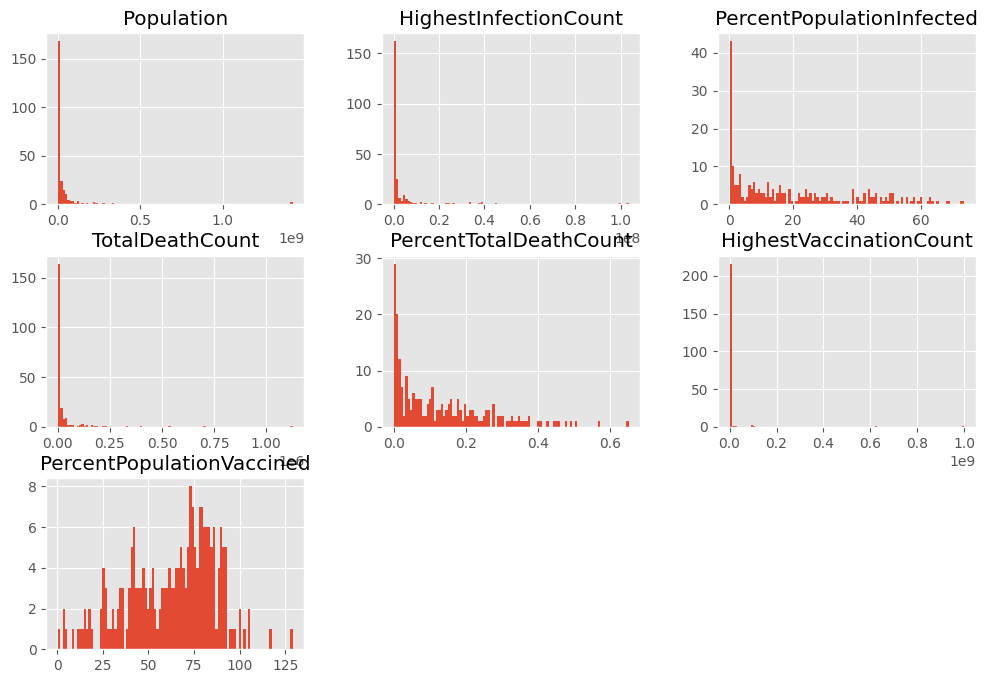

In [19]:
# Data visualization: countries
countries.hist(bins=100)
plt.show()

In [25]:
#skewness > 0 : more weight in the left tail of the distribution.
#skewness < 0 : more weight in the right tail of the distribution.


noHeadersCountries = pd.read_excel(r'C:\Users\giedr\desktop\DS\Covid\countries.xlsx', header=0)

print(noHeadersCountries.iloc[:, 2:8].skew())


HighestInfectionCount         6.359261
PercentPopulationInfected     0.814284
TotalDeathCount               7.042598
PercentTotalDeathCount        1.226629
HighestVaccinationCount      10.926879
PercentPopulationVaccined    -0.453060
dtype: float64


Text(0, 0.5, 'Density')

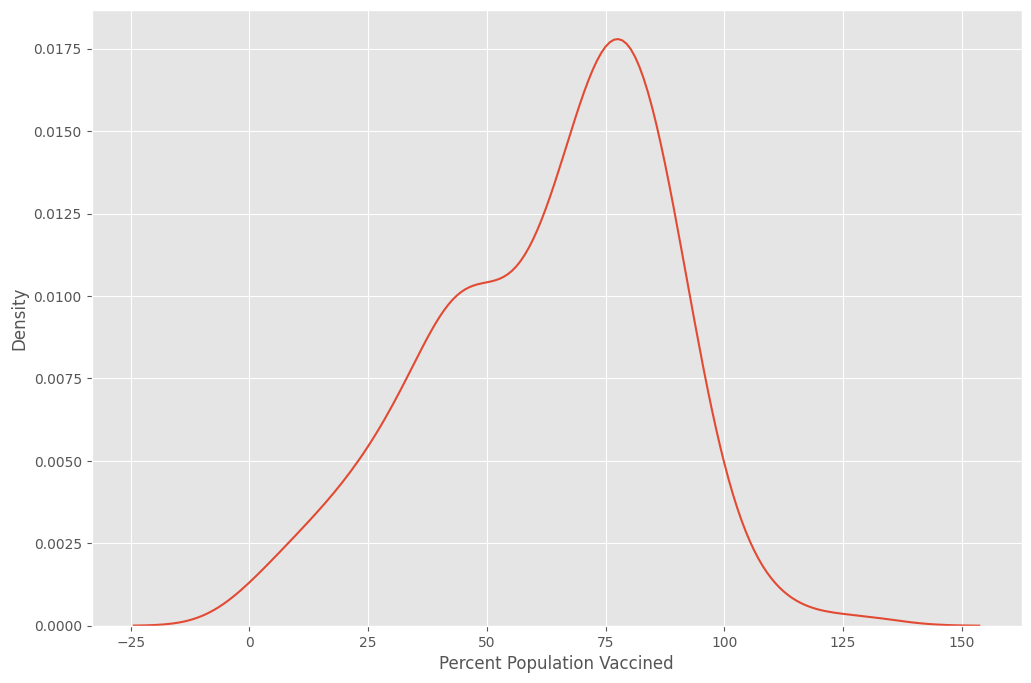

In [27]:
# Density of PercentPopulationVaccined

plt.subplot()
sns.kdeplot(countries['PercentPopulationVaccined'])
plt.xlabel('Percent Population Vaccined')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

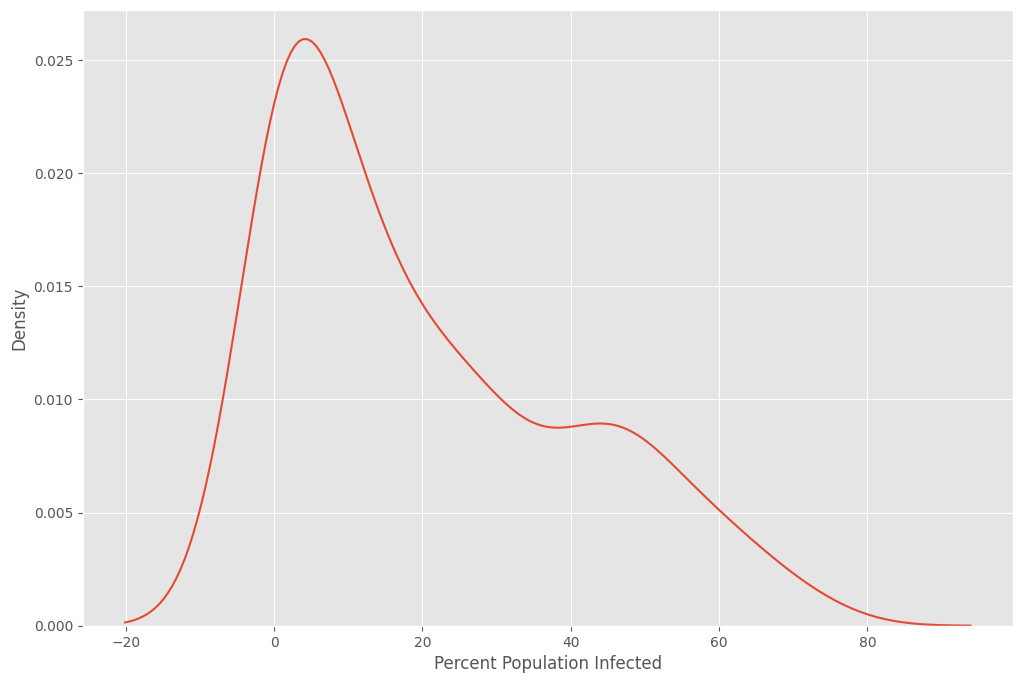

In [29]:
# Density of PercentPopulationInfected

plt.subplot()
sns.kdeplot(countries['PercentPopulationInfected'])
plt.xlabel('Percent Population Infected')
plt.ylabel('Density')


Text(0, 0.5, 'Density')

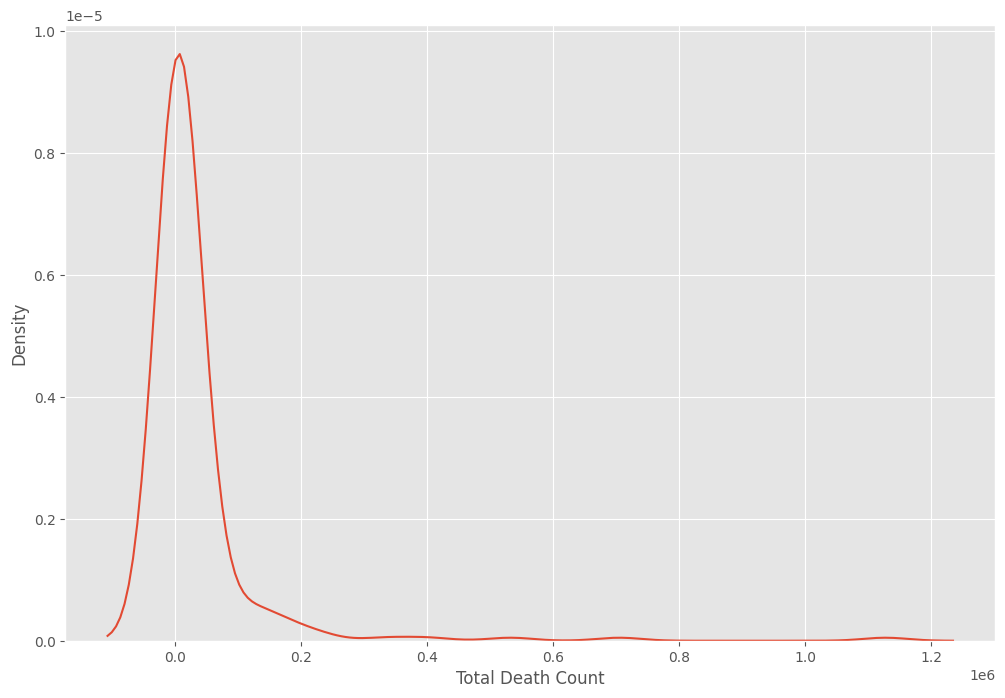

In [31]:
# Density of Total Death Count               

plt.subplot()
sns.kdeplot(countries['TotalDeathCount'])
plt.xlabel('Total Death Count')
plt.ylabel('Density')


In [83]:
# Correlation Matrix between all numeric columns
# Show diffrences between sprearman and pearson methods

In [79]:
countries.corr(numeric_only=True, method='spearman')

,Population,HighestInfectionCount,PercentPopulationInfected,TotalDeathCount,PercentTotalDeathCount,HighestVaccinationCount,PercentPopulationVaccined
Population,1.000000,0.694275,-0.461389,0.777484,-0.172263,0.796550,-0.106673
HighestInfectionCount,0.694275,1.000000,0.211036,0.934926,0.452116,0.718673,0.257092
PercentPopulationInfected,-0.461389,0.211036,1.000000,0.011592,0.690602,-0.175104,0.520731
TotalDeathCount,0.777484,0.934926,0.011592,1.000000,0.422670,0.743420,0.131483
PercentTotalDeathCount,-0.172263,0.452116,0.690602,0.422670,1.000000,0.024326,0.233771
HighestVaccinationCount,0.796550,0.718673,-0.175104,0.743420,0.024326,1.000000,0.110618
PercentPopulationVaccined,-0.106673,0.257092,0.520731,0.131483,0.233771,0.110618,1.000000


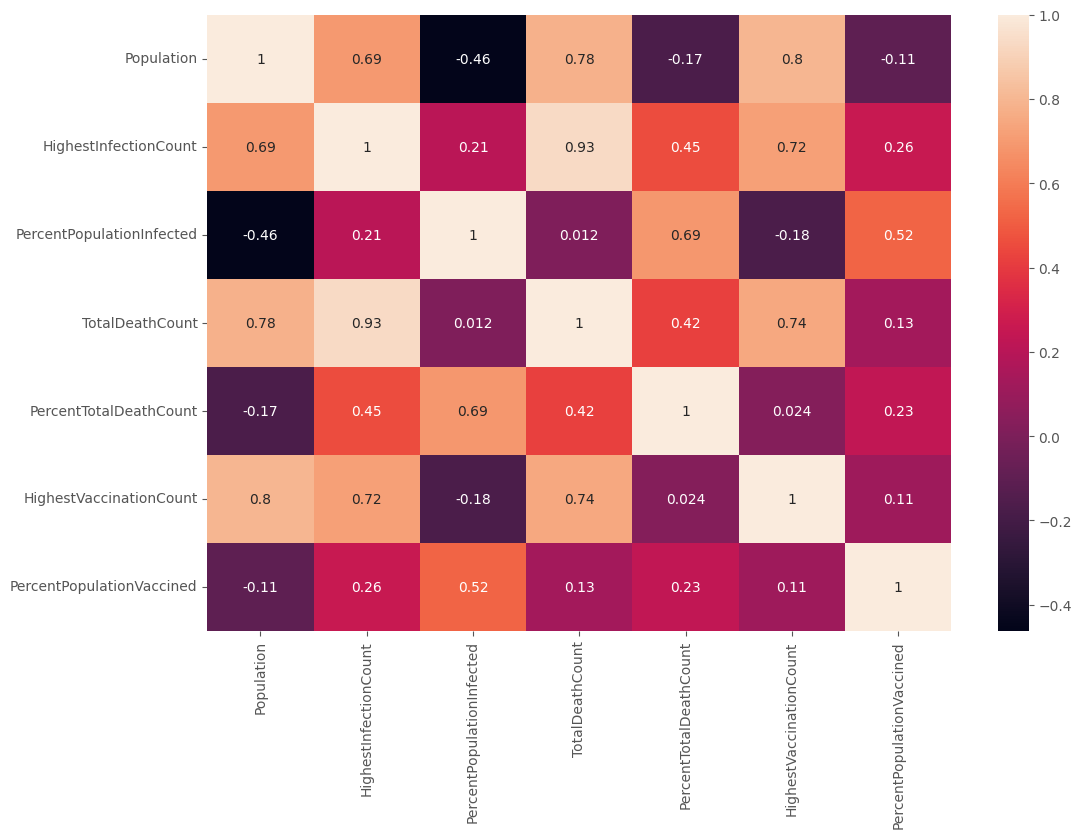

In [85]:
#correlation Heat Map
correlation_matrix = countries.corr(numeric_only=True, method='spearman')
sns.heatmap(correlation_matrix, annot=True )
plt.show()

In [80]:
countries.corr(numeric_only=True, method='pearson')

,Population,HighestInfectionCount,PercentPopulationInfected,TotalDeathCount,PercentTotalDeathCount,HighestVaccinationCount,PercentPopulationVaccined
Population,1.000000,0.697169,-0.132535,0.465458,-0.079271,0.936801,0.084404
HighestInfectionCount,0.697169,1.000000,0.098586,0.762625,0.138873,0.535687,0.213783
PercentPopulationInfected,-0.132535,0.098586,1.000000,0.011682,0.459303,-0.081946,0.474840
TotalDeathCount,0.465458,0.762625,0.011682,1.000000,0.270891,0.348702,0.171435
PercentTotalDeathCount,-0.079271,0.138873,0.459303,0.270891,1.000000,-0.074494,0.163906
HighestVaccinationCount,0.936801,0.535687,-0.081946,0.348702,-0.074494,1.000000,0.085066
PercentPopulationVaccined,0.084404,0.213783,0.474840,0.171435,0.163906,0.085066,1.000000


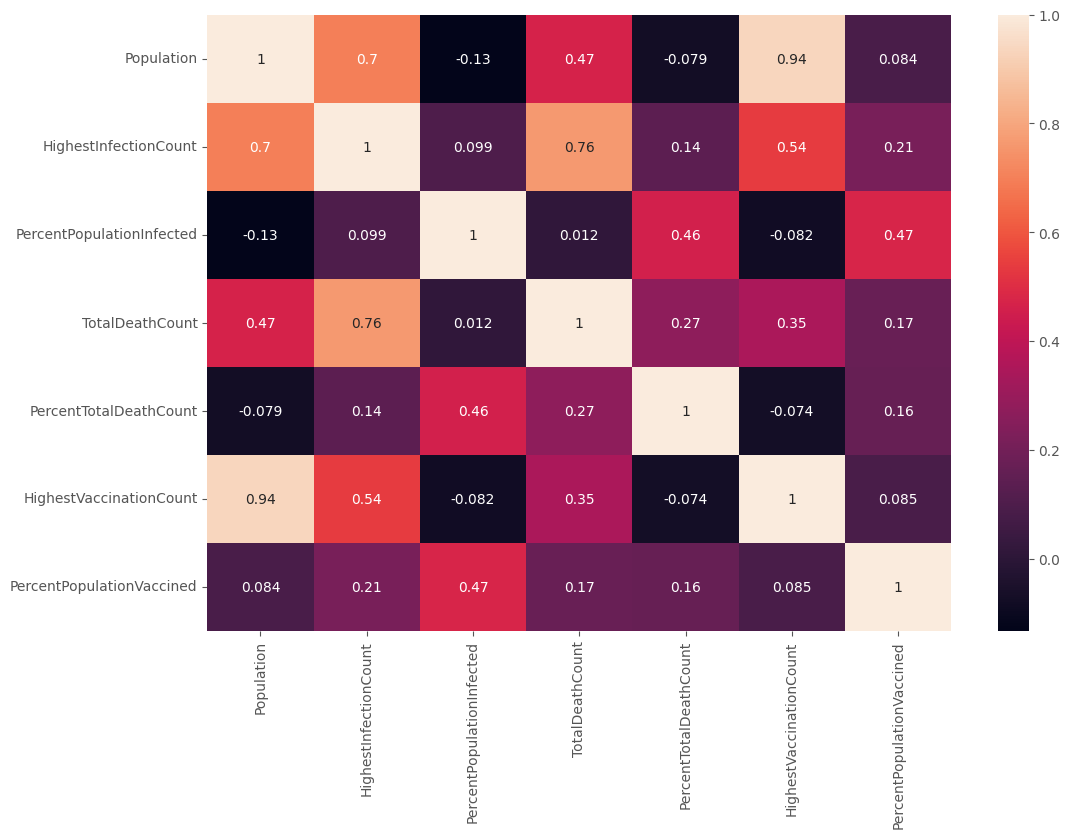

In [17]:
#correlation Heat Map
correlation_matrix = countries.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True )
plt.show()

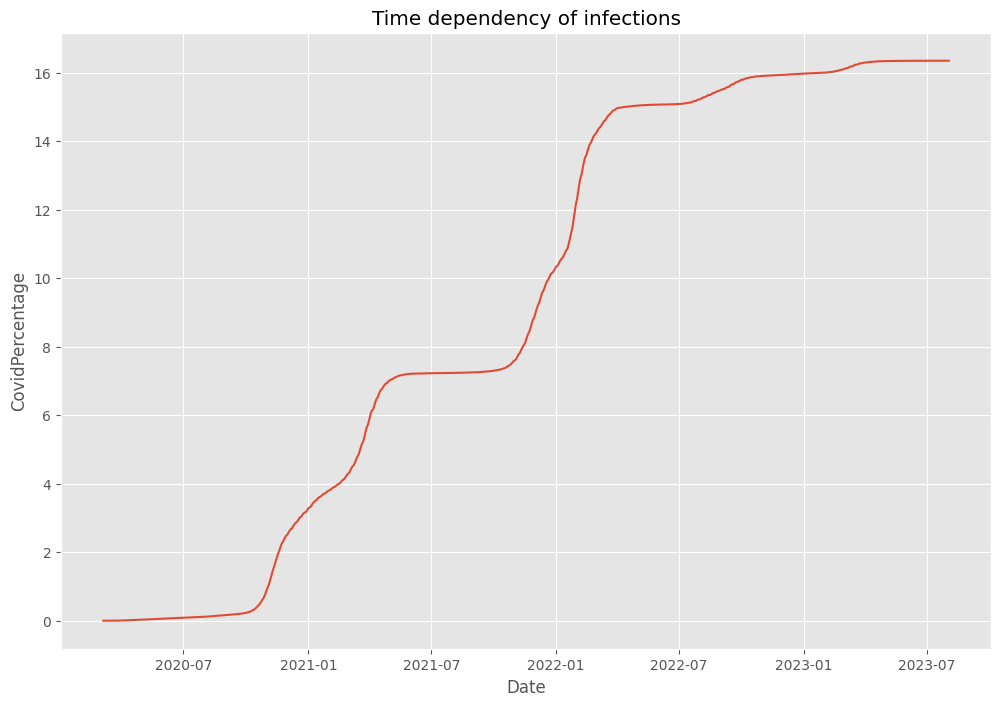

In [36]:
# Data visualization: Poland
#Time dependency of infections

plt.plot(poland['newDate'],poland['CovidPercentage']) 

plt.title('Time dependency of infections')
plt.xlabel('Date')
plt.ylabel('CovidPercentage')
plt.show()


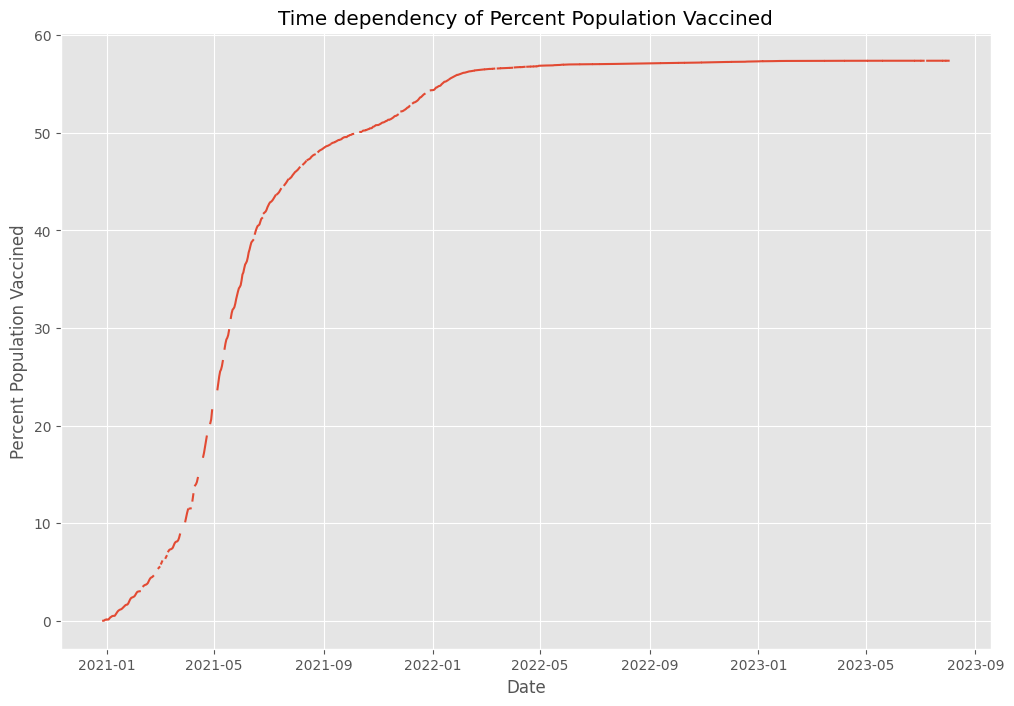

In [40]:
#Time dependency of number of deaths

plt.plot(poland['newDate'],poland['PercentPopulationVaccined']) 
plt.title('Time dependency of Percent Population Vaccined')
plt.xlabel('Date')
plt.ylabel('Percent Population Vaccined')
plt.show()

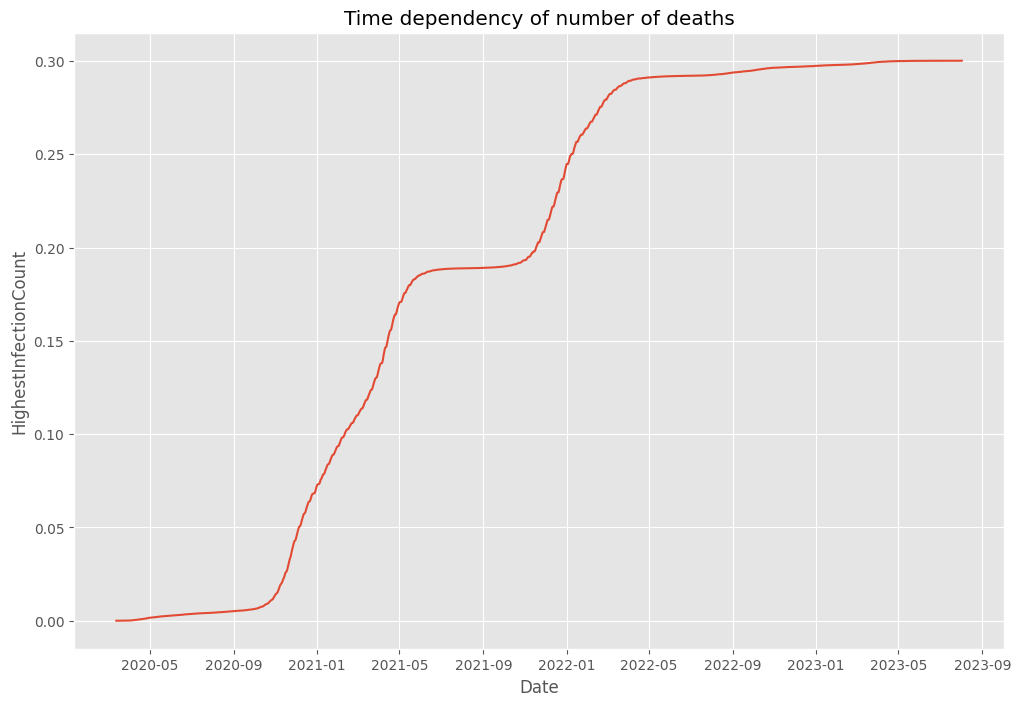

In [38]:
#Time dependency of number of deaths

plt.plot(poland['newDate'],poland['PercentTotalDeathCount']) 
plt.title('Time dependency of number of deaths')
plt.xlabel('Date') 
plt.ylabel('Percent Total Death Count')
plt.show()

In [78]:
pol_sum['PercentPopulationInfected'] = round(pol_sum['PercentPopulationInfected'], 2)
pol_sum['PercentPopulationDeath'] = round(pol_sum['PercentPopulationDeath'], 2)
pol_sum['PercentPopulationVaccined'] = round(pol_sum['PercentPopulationVaccined'], 2)


Poland_summary = {'Population': pol_sum['Population'], 'PercentPopulationInfected': pol_sum['PercentPopulationInfected'], 'PercentPopulationDeath': pol_sum['PercentPopulationDeath'], 'PercentPopulationVaccined': pol_sum['PercentPopulationVaccined']}
table= pd.DataFrame(data=Poland_summary)
def style(v, props=''):
    return props if v else None

table.style.hide(axis="index").applymap(style, subset=['PercentPopulationInfected','PercentPopulationDeath', 'PercentPopulationVaccined' ], props='color:red;')


Population,PercentPopulationInfected,PercentPopulationDeath,PercentPopulationVaccined
39857144,16.350000,0.300000,57.400000


In [52]:
# Data visualization: continents

continents = {'Name': continents['continent'], 'TotalPopulation': continents['total_population'], 'TotalCases': continents['total_cases'], 'HighestVaccinationCount': continents['HighestVaccinationCount'], 'TotalDeathCount': continents['TotalDeathCount'] }
table= pd.DataFrame(data=continents)
table.sort_values(by=['Name'])
table.style.highlight_max(subset=['TotalPopulation', 'TotalCases', 'HighestVaccinationCount', 'TotalDeathCount'], color='#FFD4D4', axis = 0).hide(axis="index").highlight_between(subset='Name', color='#DEEFF5')



Name,TotalPopulation,TotalCases,HighestVaccinationCount,TotalDeathCount
North America,785515347867,124418230,99925,1127152
Asia,6182718331506,299204361,999891,531917
Africa,1865418652577,13106653,9999633,102595
Oceania,58937067766,14410671,99607,22482
South America,571745118024,68817295,99847,704659
Europe,1060426974586,249042105,99992,399854


In [75]:
# Data visualization: world
world['DeathPercentage'] = round(world['DeathPercentage'], 2)
world['PrecentPopulationVaccined'] = round(world['PrecentPopulationVaccined'], 2)


world = {'TotalPopulation': world['total_population'], 'TotalCases': world['total_cases'], 'TotalDeaths': world['total_deaths'],  'DeathPercentage': world['DeathPercentage'], 'PrecentPopulationVaccined': world['PrecentPopulationVaccined'] }
table= pd.DataFrame(data=world)

def style(v, props=''):
    return props if v else None

table.style.hide(axis="index").applymap(style, subset=['TotalDeaths','DeathPercentage', 'PrecentPopulationVaccined' ], props='color:red;')


TotalPopulation,TotalCases,TotalDeaths,DeathPercentage,PrecentPopulationVaccined
42480228203477,3258495536,29563200,0.910000,0.320000
